In [47]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import loadtxt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
train.dropna(subset=['Embarked'], inplace=True)

#Mean imputation
numeric_columns = train.select_dtypes(include=['number']).columns
mean = train[numeric_columns].mean()

print(mean)
train = train.fillna(mean)

#Mode imputation
cabin_mode = train['Cabin'].mode()[0]
print(cabin_mode)
train['Cabin'].fillna(cabin_mode, inplace=True)

PassengerId    446.000000
Survived         0.382452
Pclass           2.311586
Age             29.642093
SibSp            0.524184
Parch            0.382452
Fare            32.096681
dtype: float64
B96 B98


<ipython-input-6-e53fceeecb82>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin'].fillna(cabin_mode, inplace=True)


In [7]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [9]:
test.dropna(subset=['Fare'], inplace=True)

#Mean imputation
numeric_columns = test.select_dtypes(include=['number']).columns
mean_1 = test[numeric_columns].mean()

print(mean_1)
test = test.fillna(mean_1)

#Mode imputation
cabin_mode_1 = test['Cabin'].mode()[0]
print(cabin_mode_1)
test['Cabin'].fillna(cabin_mode_1, inplace=True)

PassengerId    1100.635492
Pclass            2.263789
Age              30.181269
SibSp             0.448441
Parch             0.393285
Fare             35.627188
dtype: float64
B57 B59 B63 B66


<ipython-input-9-4cde0088da59>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Cabin'].fillna(cabin_mode_1, inplace=True)


In [10]:
train[train.duplicated()].shape

(0, 12)

In [11]:
train=train.drop_duplicates()

In [12]:
test[test.duplicated()].shape

(0, 11)

In [13]:
test=test.drop_duplicates()

#Data Visualization

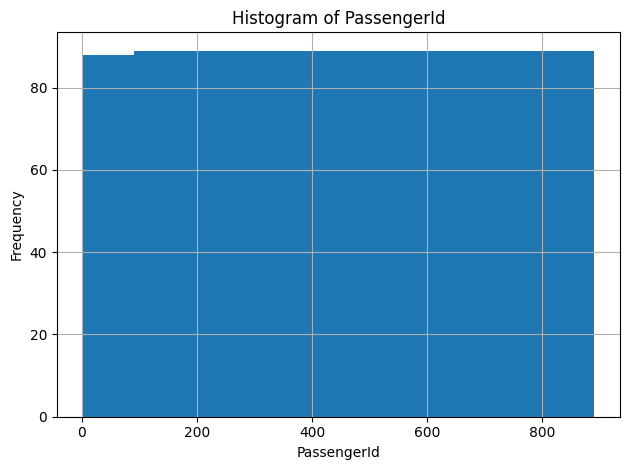

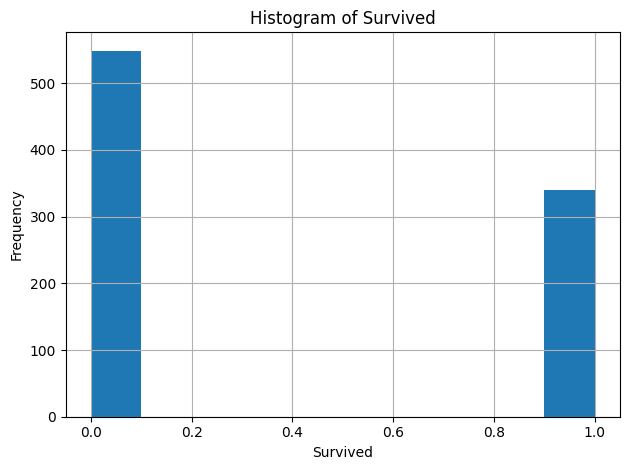

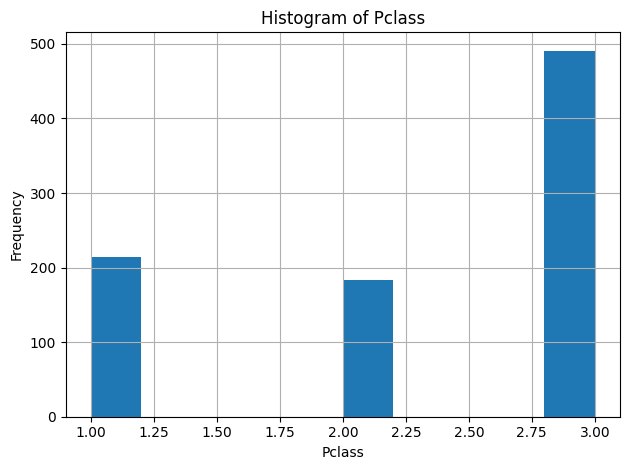

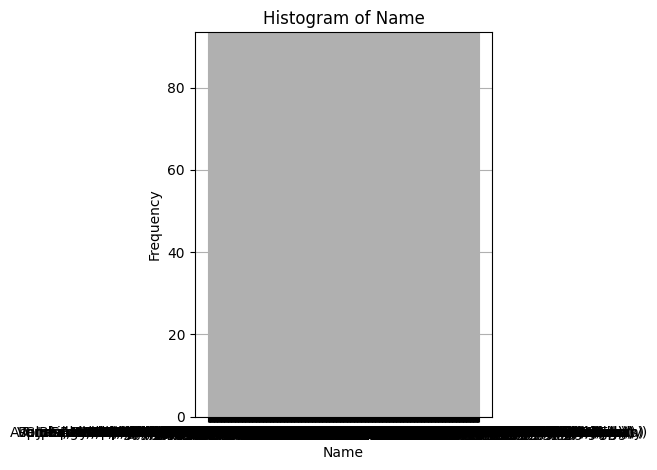

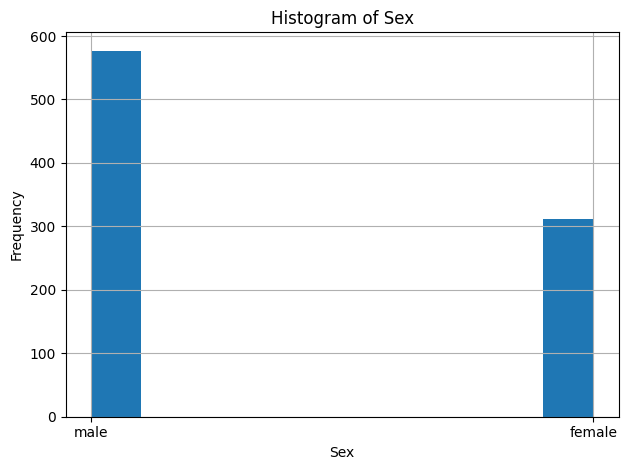

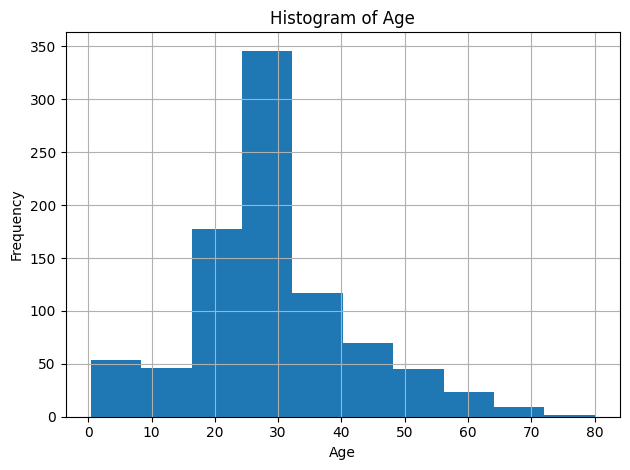

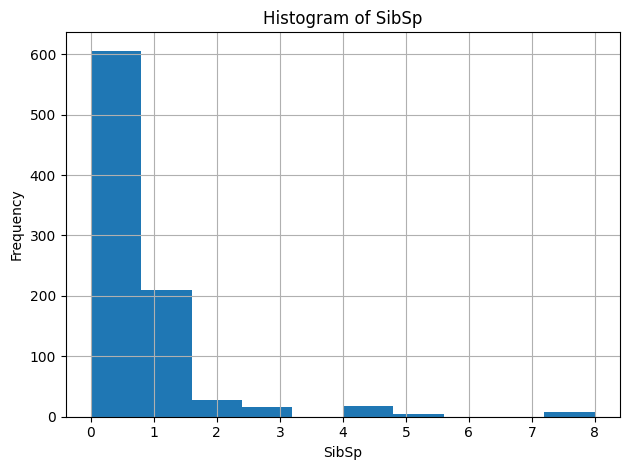

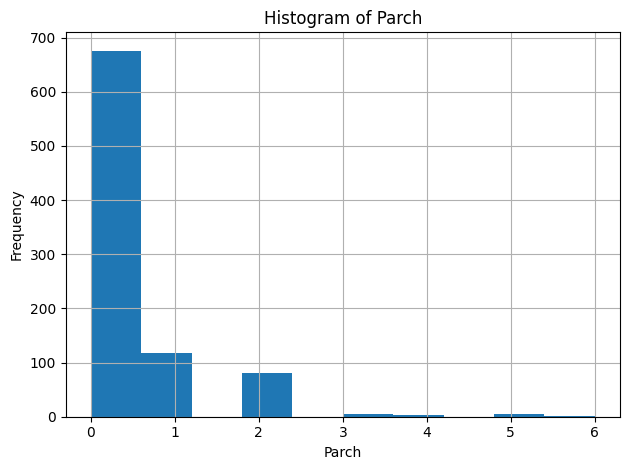

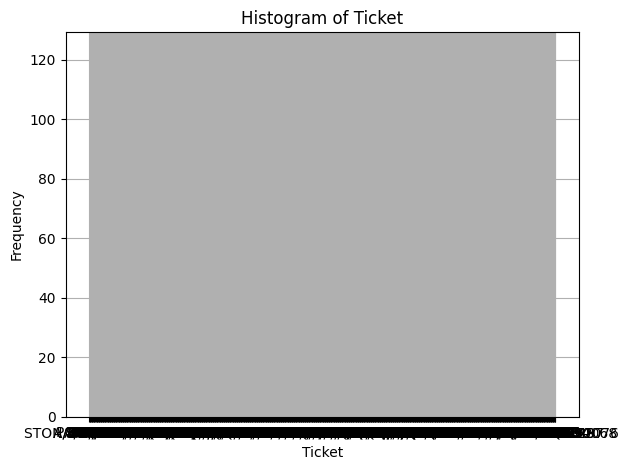

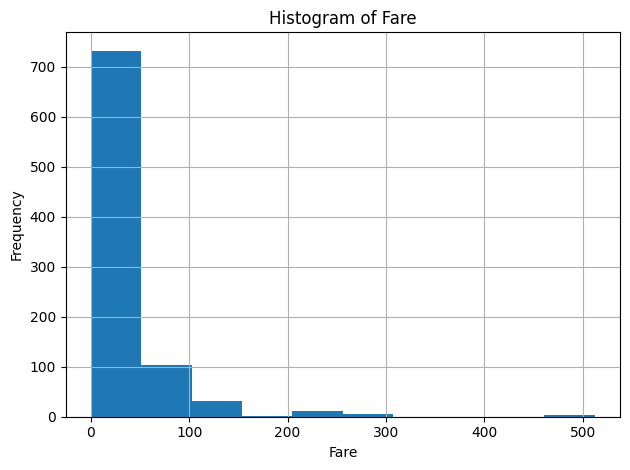

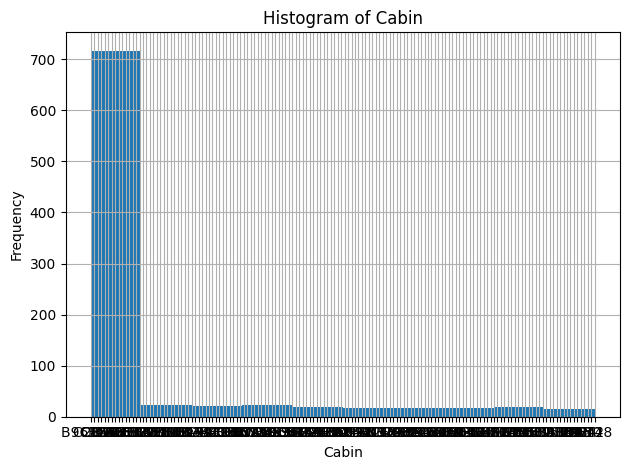

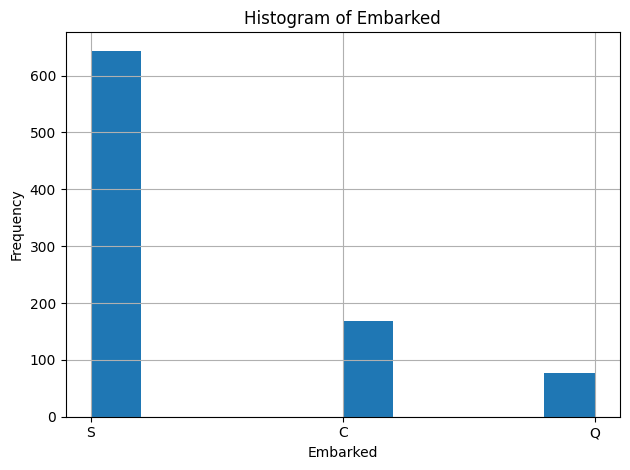

In [14]:
#Generate histograms
for col in train:
    plt.figure()
    train[col].hist()
    #plt.hist(numerical_data[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

Whiskers of PassengerId: [1.0, 891.0]
Outliers of PassengerId: []
Number of outliers: 0
Whiskers of Pclass: [1.0, 3.0]
Outliers of Pclass: []
Number of outliers: 0
Whiskers of Age: [3.0, 54.0]
Outliers of Age: [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]
Number of outliers: 65
Whiskers of SibSp: [0.0, 2.0]
Outliers of SibSp: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8]
Number of outliers: 46
Whiskers of Parch: [0.0, 0.0]
Outliers of Parch: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

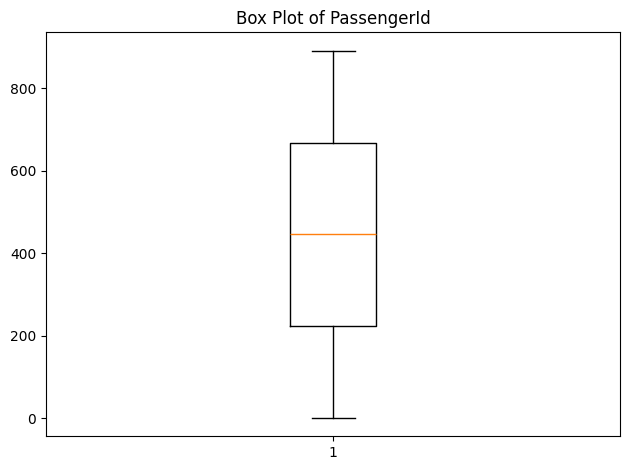

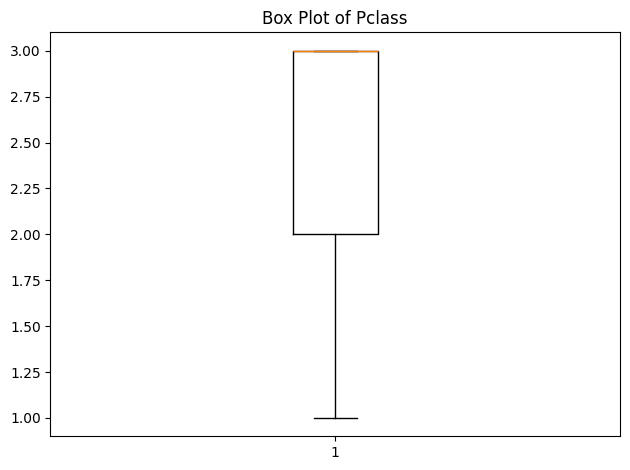

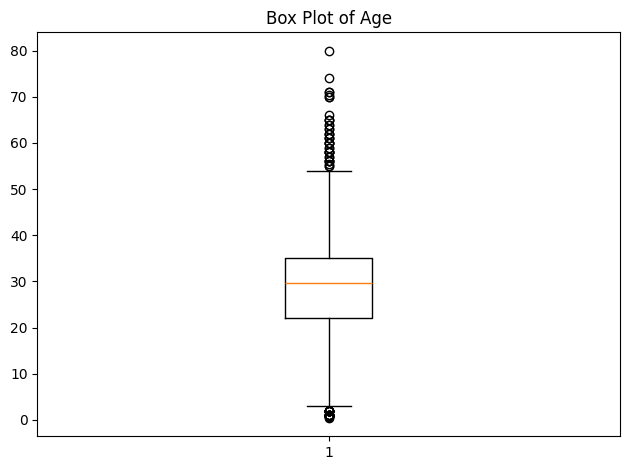

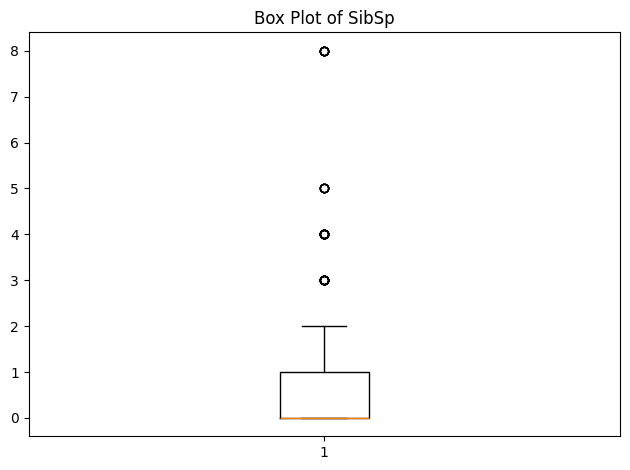

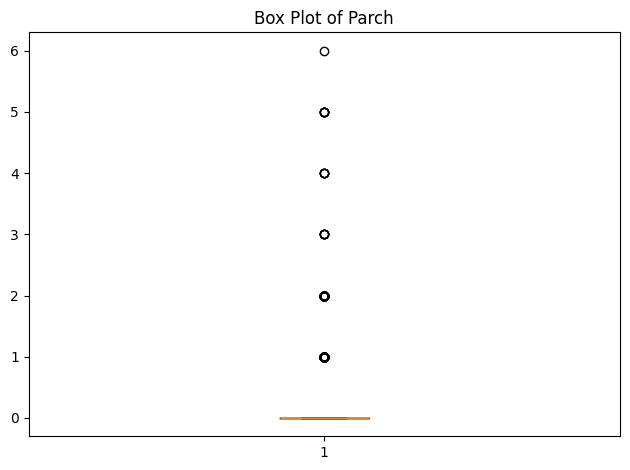

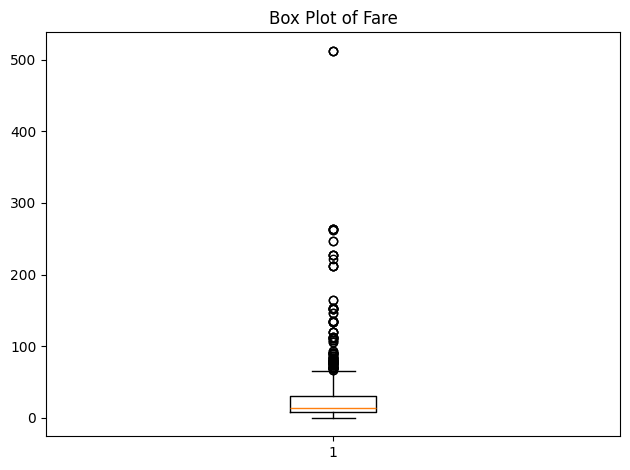

In [15]:
#Generate box plot
for col in train[numeric_columns]:
    plt.figure()
    box = plt.boxplot(train[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

    #To get the whiskers
    whiskers = [item.get_ydata()[1] for item in box['whiskers']]
    print(f'Whiskers of {col}:', whiskers)

    #Extracting outliers
    outliers = [ydata for item in box['fliers'] for ydata in item.get_ydata()]
    outliers.sort()
    print(f'Outliers of {col}: {outliers}')
    print(f'Number of outliers:' , len(outliers))

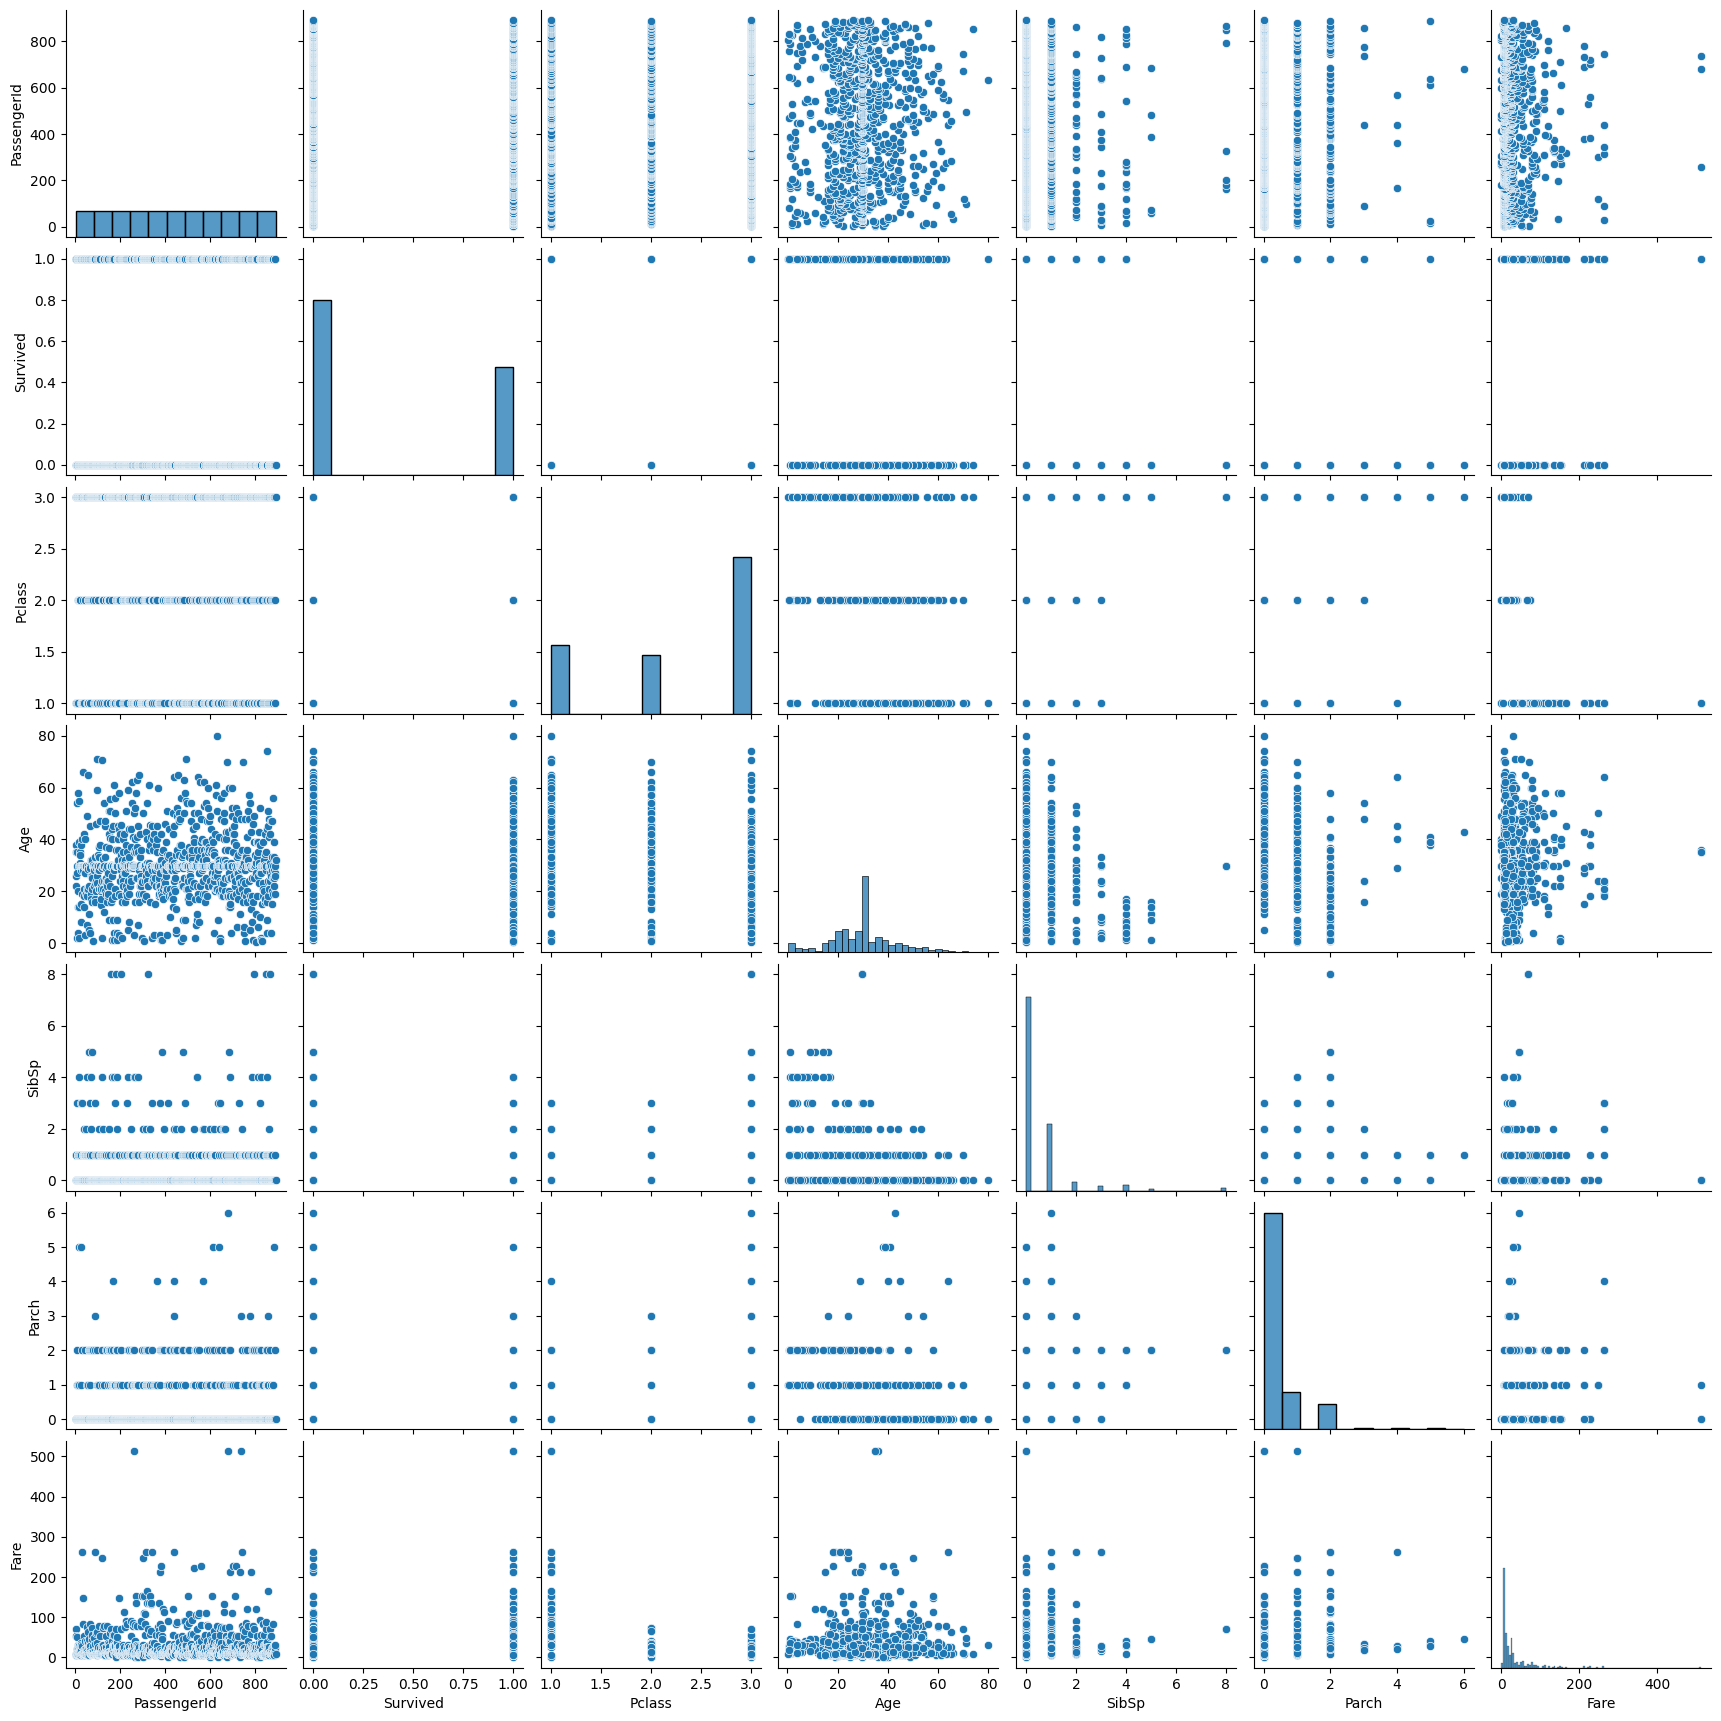

In [16]:
sns.pairplot(train)

#Data pre-processing

In [17]:
#Check for number of unique values in each column
train.nunique(axis=0)

,0
PassengerId,889
Survived,2
Pclass,3
Name,889
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,680
Fare,247


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#Remove name column and scale age and fare
train = train.drop(['Name', 'PassengerId'] , axis=1)
test = test.drop(['Name', 'PassengerId'], axis=1)

# Create a StandardScaler object
scaler = StandardScaler()
train['Age'] = scaler.fit_transform(train[['Age']])
test['Age'] = scaler.transform(test[['Age']])

train['Fare'] = scaler.fit_transform(train[['Fare']])
test['Fare'] = scaler.transform(test[['Fare']])

In [20]:
#import libraries
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder = LabelEncoder()
columns_to_encode = list(train.columns)
print(columns_to_encode)
columns_to_encode.remove('Age')
columns_to_encode.remove('Fare')
print(columns_to_encode)

# Apply label encoding to each column individually or use apply
for column in columns_to_encode:
    train[column] = labelencoder.fit_transform(train[column])

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']


In [22]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,1,-5.896199e-01,1,0,522,-0.500240,46,2
1,1,0,0,6.448480e-01,1,0,595,0.788947,80,0
2,1,2,0,-2.810029e-01,0,0,668,-0.486650,46,2
3,1,0,0,4.133853e-01,1,0,48,0.422861,54,2
4,0,2,1,4.133853e-01,0,0,471,-0.484133,46,2
...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,-2.038487e-01,0,0,100,-0.384475,46,2
887,1,0,0,-8.210826e-01,0,0,14,-0.042213,29,2
888,0,2,0,-5.482138e-16,1,2,674,-0.174084,46,2
889,1,0,1,-2.810029e-01,0,0,8,-0.042213,59,0


#Model Building

In [23]:
# split data into X and Y
X = train.drop('Survived', axis=1)
Y = train['Survived']

In [24]:
# split data into train and test sets
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

##XBGM model

In [25]:
#!pip install --upgrade scikit-learn

In [26]:
# fit model to training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
# make predictions for test data
preds = model.predict(x_test)
preds = [round(value) for value in preds]

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
accuracy = accuracy_score(y_test,preds)
print(f"Accuracy: {accuracy}")

print("Accuracy: %.2f%%" % (accuracy * 100.0))


precision = precision_score(y_test, preds, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

recall = recall_score(y_test, preds, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, preds, average='weighted')
print(f"F1-score: {f1}")


Accuracy: 0.8163265306122449
Accuracy: 81.63%
Precision: 0.8156316289956843
Recall: 0.8163265306122449
F1-score: 0.8145542427497315


##Light GBM

In [30]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [31]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt' #gradient boosting decision tree
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10 #i think these are %
params['min_data'] = 50
params['max_depth'] = 10

In [32]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 220, number of negative: 375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.156446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369748 -> initscore=-0.533298
[LightGBM] [Info] Start training from score -0.533298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


##Prediction and Evaluation

In [33]:
#Prediction
y_pred=clf.predict(x_test)

In [34]:
predictions = [round(value) for value in y_pred]

In [35]:
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy}")

print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.6156462585034014
Accuracy: 61.56%
Precision: 0.7220670724430123
Recall: 0.6156462585034014
F1-score: 0.4967589102824592


#Hyper parameter tuning

In [36]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [48]:
# Hyperparameter Tuning with Cross-Validation for LGBM
param_grid = {
    'learning_rate': [0.003, 0.01, 0.03, 0.1],
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [10, 20, 30],
    'min_data': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

clf = LGBMClassifier(**params)
clf.fit(x_train, y_train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

print(best_model)

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 220, number of negative: 375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 9
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "boosting_type", "min_data", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
import xgboost as xgb

In [39]:
!pip install scikit-learn==1.2.2

In [40]:
param_grid1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Create StratifiedKFold for cross-validation
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid1,
                           scoring='accuracy', cv=cv1, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params1 = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params1)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:12:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params for LGBM is max_depth=5, metric='binary_logloss', min_data=100, num_leaves=10, objective='binary'

Best Hyperparameters fir XBGM: 'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9

#Applying to testing set

In [53]:
test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,0.374808,0,0,330911,-0.488579,B57 B59 B63 B66,Q
1,3,female,1.339236,1,0,363272,-0.505273,B57 B59 B63 B66,S
2,2,male,2.496550,0,0,240276,-0.451165,B57 B59 B63 B66,Q
3,3,male,-0.203849,0,0,315154,-0.471802,B57 B59 B63 B66,S
4,3,female,-0.589620,1,1,3101298,-0.398819,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...
413,3,male,0.041600,0,0,A.5. 3236,-0.484133,B57 B59 B63 B66,S
414,1,female,0.722002,0,0,PC 17758,1.546286,C105,C
415,3,male,0.683425,0,0,SOTON/O.Q. 3101262,-0.500240,B57 B59 B63 B66,S
416,3,male,0.041600,0,0,359309,-0.484133,B57 B59 B63 B66,S


In [59]:
# Apply the pre-fitted LabelEncoder to the test data
for col in columns_to_encode1:
  # Fit the LabelEncoder if it hasn't been fitted for this column in 'test'
  if col in test.columns and not hasattr(labelencoder, f"classes_{col}"):
    labelencoder.fit(test[col])
  test[col] = labelencoder.transform(test[col])

In [62]:
test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,0.374808,0,0,152,-0.488579,15,1
1,2,0,1.339236,1,0,221,-0.505273,15,2
2,1,1,2.496550,0,0,73,-0.451165,15,1
3,2,1,-0.203849,0,0,147,-0.471802,15,2
4,2,0,-0.589620,1,1,138,-0.398819,15,2
...,...,...,...,...,...,...,...,...,...
413,2,1,0.041600,0,0,266,-0.484133,15,2
414,0,0,0.722002,0,0,323,1.546286,22,0
415,2,1,0.683425,0,0,345,-0.500240,15,2
416,2,1,0.041600,0,0,220,-0.484133,15,2


LBGM

In [63]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt' #gradient boosting decision tree
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 5

clf = LGBMClassifier(**params)
clf.fit(x_train, y_train)

#Prediction
new_preds=clf.predict(test)

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 220, number of negative: 375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 9
[LightGBM] [Info] [binary:Boos

XBGM

In [64]:
model = XGBClassifier(
    colsample_bytree=1.0,
    gamma=0.1,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.9
)
model.fit(x_train, y_train)
preds = model.predict(test)

Visualization (Comparitive Analysis)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


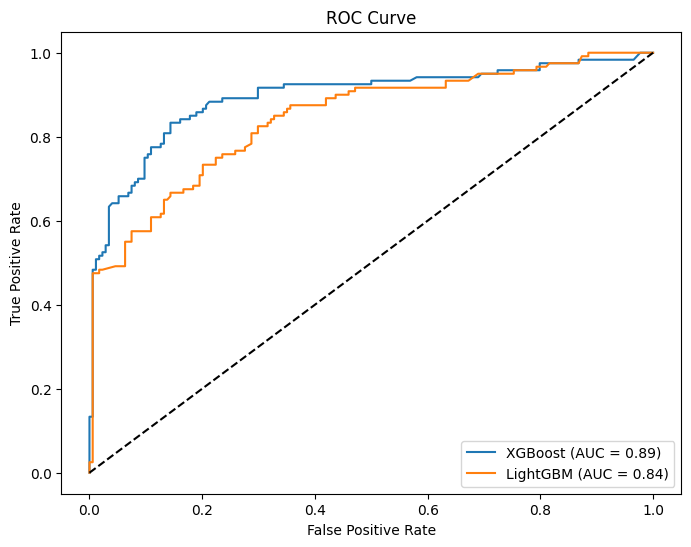

In [65]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for both models
xgb_model.fit(x_train, y_train)
xgb_probs = model.predict_proba(x_test)[:, 1]
lgb_probs = clf.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate ROC curve and AUC for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_probs)
auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**XGBoost (AUC = 0.87):**

Strength: XGBoost demonstrates a relatively high AUC score of 0.87, indicating its good ability to distinguish between the positive and negative classes (passengers who survived and those who didn't). The curve is significantly above the random classifier diagonal line, indicating good performance overall.

Weakness: While XGBoost performs well, the ROC curve isn't perfectly hugging the top-left corner, implying there is still some misclassification occurring, although less compared to LightGBM.


**LightGBM (AUC = 0.84):**


Strength: LightGBM also shows a decent performance with an AUC of 0.84. It's still performing better than a random classifier, demonstrating a reasonable ability to separate the classes.

Weakness: Compared to XGBoost, LightGBM's lower AUC suggests it's slightly weaker at differentiating between the positive and negative classes. This means it might have more false positives or false negatives for certain decision thresholds.

#Inferences

1. Before hyperparameter tuning, XGBM performs significantly better than LGBM for this dataset

# Evaluation metrics:

**LBGM**

Accuracy: 0.6156462585034014
Accuracy: 61.56%
Precision: 0.7220670724430123
Recall: 0.6156462585034014
F1-score: 0.4967589102824592

**XBGM**

Accuracy: 0.8163265306122449
Accuracy: 81.63%
Precision: 0.8156316289956843
Recall: 0.8163265306122449
F1-score: 0.8145542427497315

After hyperparameter tuning:

XGBoost appears to be the stronger model for this dataset based on its higher AUC value, suggesting it's better at predicting survival outcomes with fewer misclassifications.

LightGBM is still a capable model, but it might not be as accurate as XGBoost for certain scenarios.